# Importing required Libraries

In [139]:
import os
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import missingno as msno
import numpy as np

# Data Preprocessing

In [140]:
df = pd.read_csv('/content/Set03.csv')
df2 = pd.read_csv('/content/kidney_disease.csv')

In [141]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [142]:
df2.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [144]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [145]:
names = []
for col in df.columns:
  names.append(col)
names

['Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cell',
 'Pus Cell clumps',
 'Bacteria',
 'Blood Glucose Random',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Class']

In [146]:
df2.info()
for col in df2.columns:
  print(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [147]:
# df2.drop(['id'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [148]:
names.append("Missing Column")

In [149]:
df2.columns = names
df2

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,Missing Column
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [150]:
df2['Class'] = df2['Class'].map({'ckd': 1, 'notckd': 0})


In [151]:
df2

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,Missing Column
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,NaN,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,NaN,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,NaN,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,NaN,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,NaN,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,NaN,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,NaN,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,NaN,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,NaN,notckd


In [152]:
df_merged = df.append(df2, ignore_index=True)

In [153]:
df_merged

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,Missing Column
0,48,70.0,1.005,4.000,0.0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,1.0,NaN
1,53,90.0,1.020,2.000,0.0,abnormal,abnormal,present,notpresent,70,...,12100,3.7,yes,yes,no,poor,no,yes,1.0,NaN
2,63,70.0,1.010,3.000,0.0,abnormal,abnormal,present,notpresent,380,...,4500,3.8,yes,yes,no,poor,yes,no,1.0,NaN
3,68,80.0,1.010,3.000,2.0,normal,abnormal,present,present,157,...,11000,2.6,yes,yes,yes,poor,yes,no,1.0,NaN
4,61,80.0,1.015,2.000,0.0,abnormal,abnormal,notpresent,notpresent,173,...,9200,3.2,yes,yes,yes,poor,yes,yes,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,395,55.0,80.000,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,NaN,notckd
554,396,42.0,70.000,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,NaN,notckd
555,397,12.0,80.000,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,NaN,notckd
556,398,17.0,60.000,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,NaN,notckd


In [154]:
# df_merged.to_csv("kidney_merged.csv",  encoding='utf-8')

In [155]:
#Run this cell
ckd_df = pd.read_csv('/content/kidney_merged.csv')
ckd_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [156]:
#Run this cell
kd_df = pd.concat([ckd_df]*2)
kd_df

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1.0
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1.0
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1.0
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1.0
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,0.0
554,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,0.0
555,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,0.0
556,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,0.0


In [157]:
# kd_df.to_csv("kidney_final2.csv",  encoding='utf-8')

**Pickle to csv**

In [158]:
# import pickle as pkl
# import pandas as pd
# with open("diag_dict.pkl", "rb") as f:
#     object = pkl.load(f)

# df = pd.DataFrame([object])
# df.to_csv(r'file1.csv')

In [159]:
# import pickle


# with open('12m_test_ids.pkl', 'rb') as f:
#     data = pickle.load(f)

# print(data)

# Data Visualization

In [160]:
kd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 557
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1098 non-null   float64
 1   Blood Pressure           1092 non-null   float64
 2   Specific Gravity         1022 non-null   float64
 3   Albumin                  1024 non-null   float64
 4   Sugar                    1018 non-null   float64
 5   Red Blood Cells          812 non-null    object 
 6   Pus Cell                 986 non-null    object 
 7   Pus Cell clumps          1108 non-null   object 
 8   Bacteria                 1108 non-null   object 
 9   Blood Glucose Random     1028 non-null   float64
 10  Blood Urea               1078 non-null   float64
 11  Serum Creatinine         1082 non-null   float64
 12  Sodium                   942 non-null    float64
 13  Potassium                940 non-null    float64
 14  Hemoglobin               

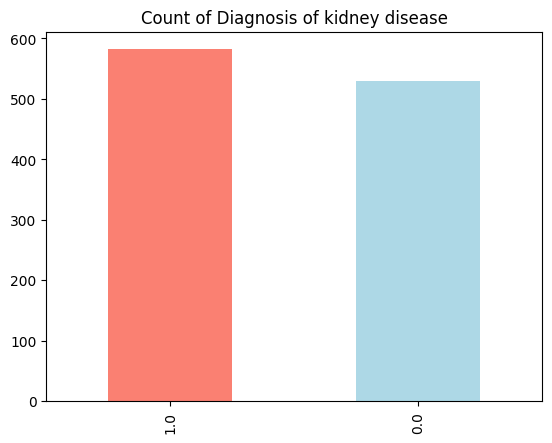

In [161]:

kd_df['Class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease");

**Checking how many instances of each class are present**

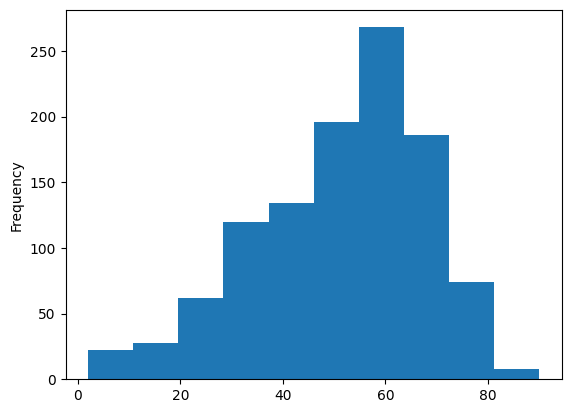

In [162]:

kd_df['Age'].plot(kind='hist');

**Checking the  age difference with a histogram**

In [163]:
kd_df['Class'].value_counts()

1.0    582
0.0    530
Name: Class, dtype: int64

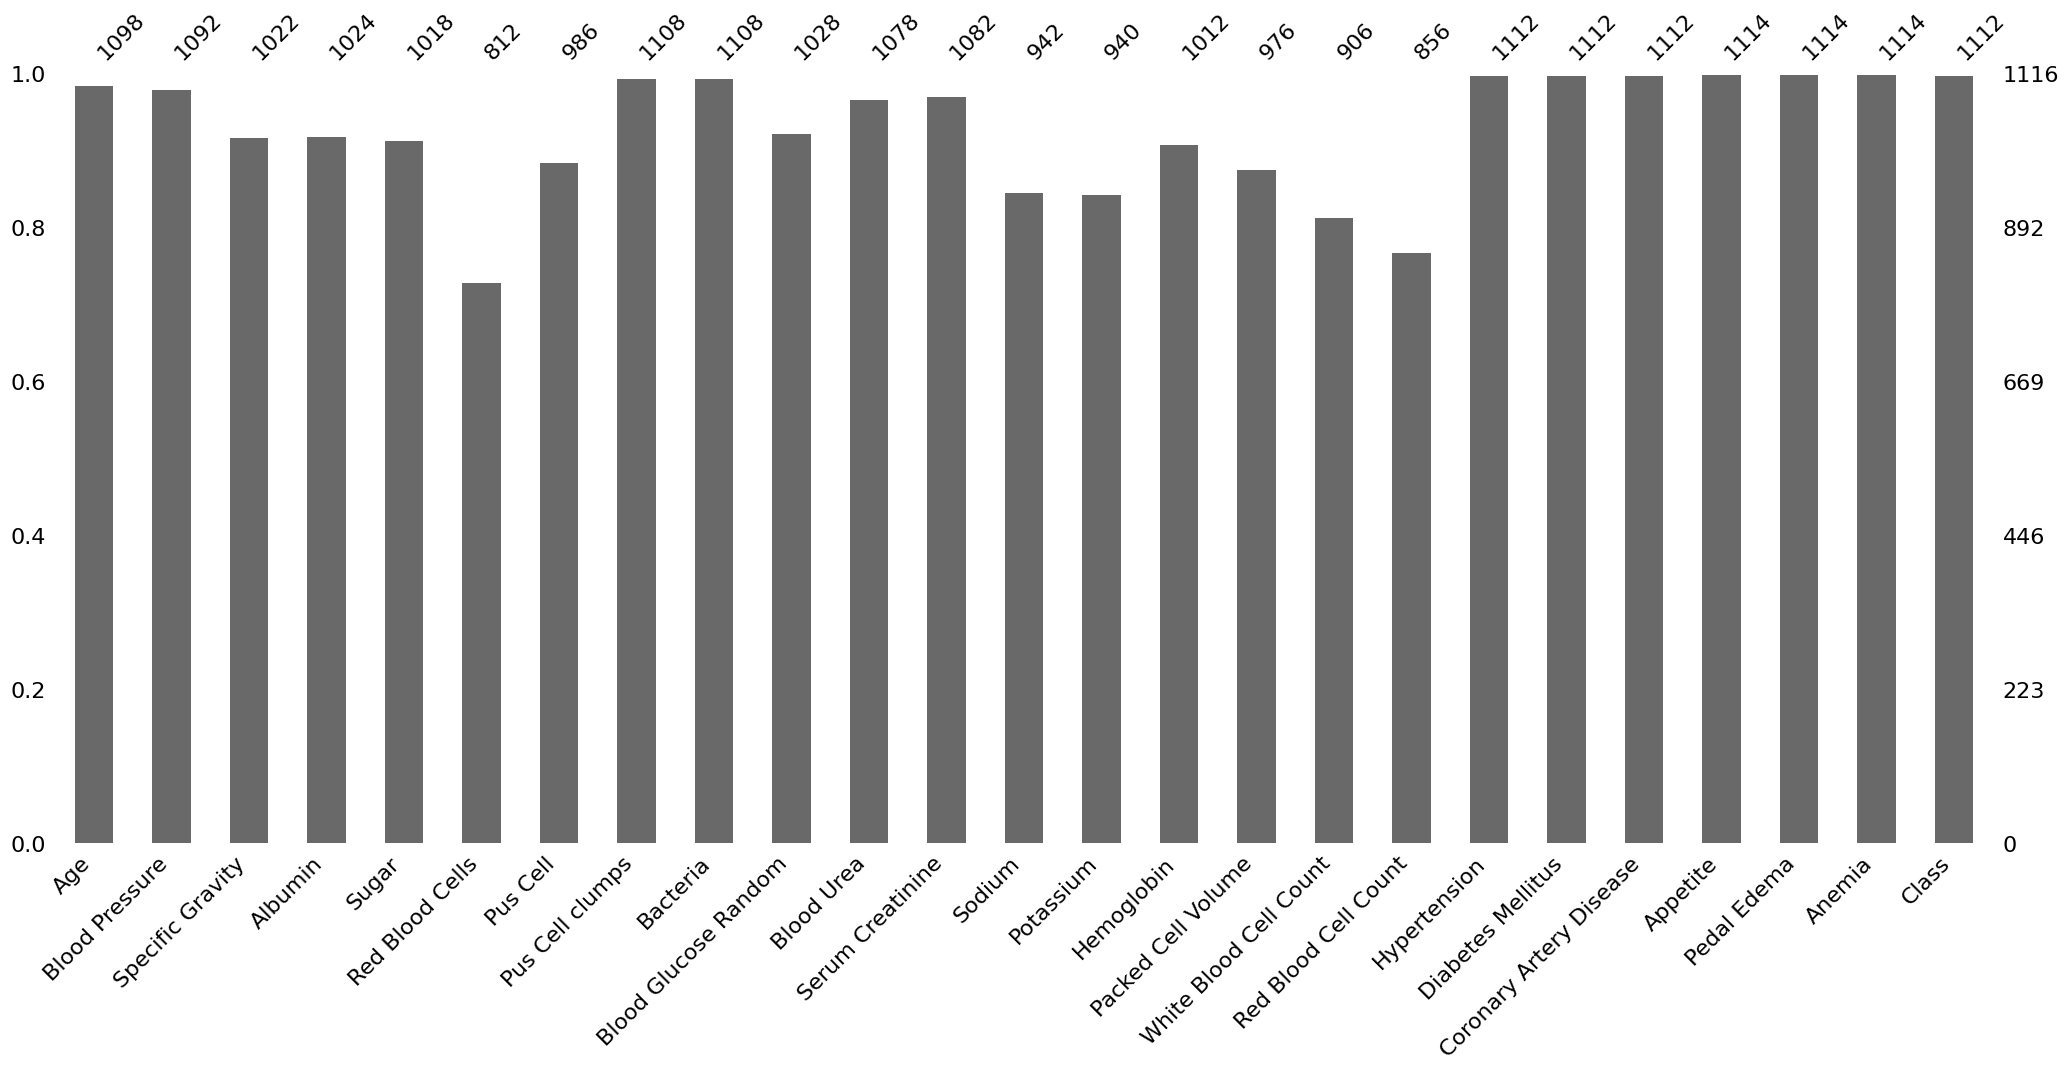

In [164]:

p = msno.bar(kd_df)

**Inference: Here any features which are not touching the 1116 mark at the top  have some null values.**

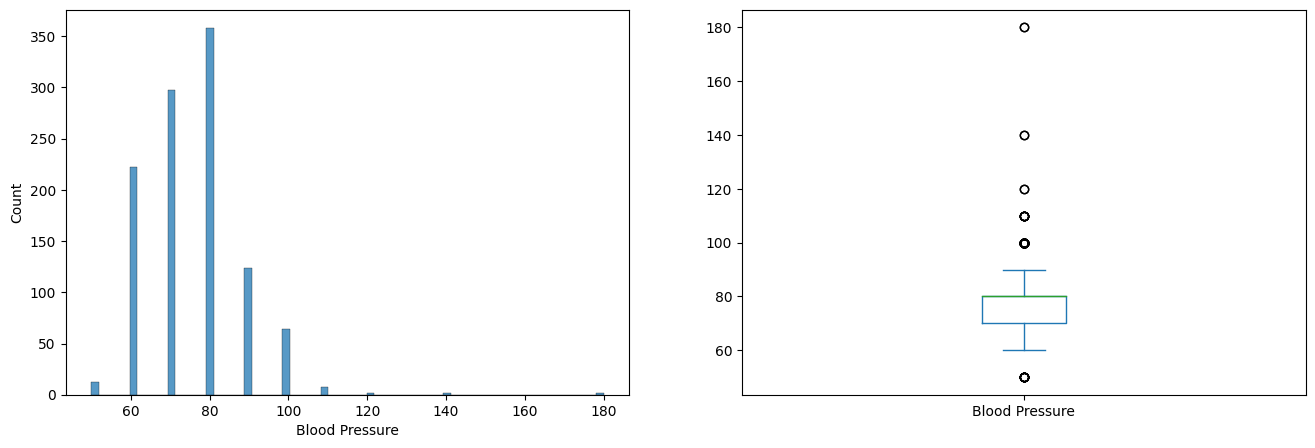

In [165]:
plt.subplot(121), sns.histplot(kd_df['Blood Pressure'])
plt.subplot(122), kd_df['Blood Pressure'].plot.box(figsize=(16,5))
plt.show()

**Inference: In the above graph we can see the distribution of blood pressure and  in the subplot it is visible that blood pressure column has some outliers in it.**

<Axes: >

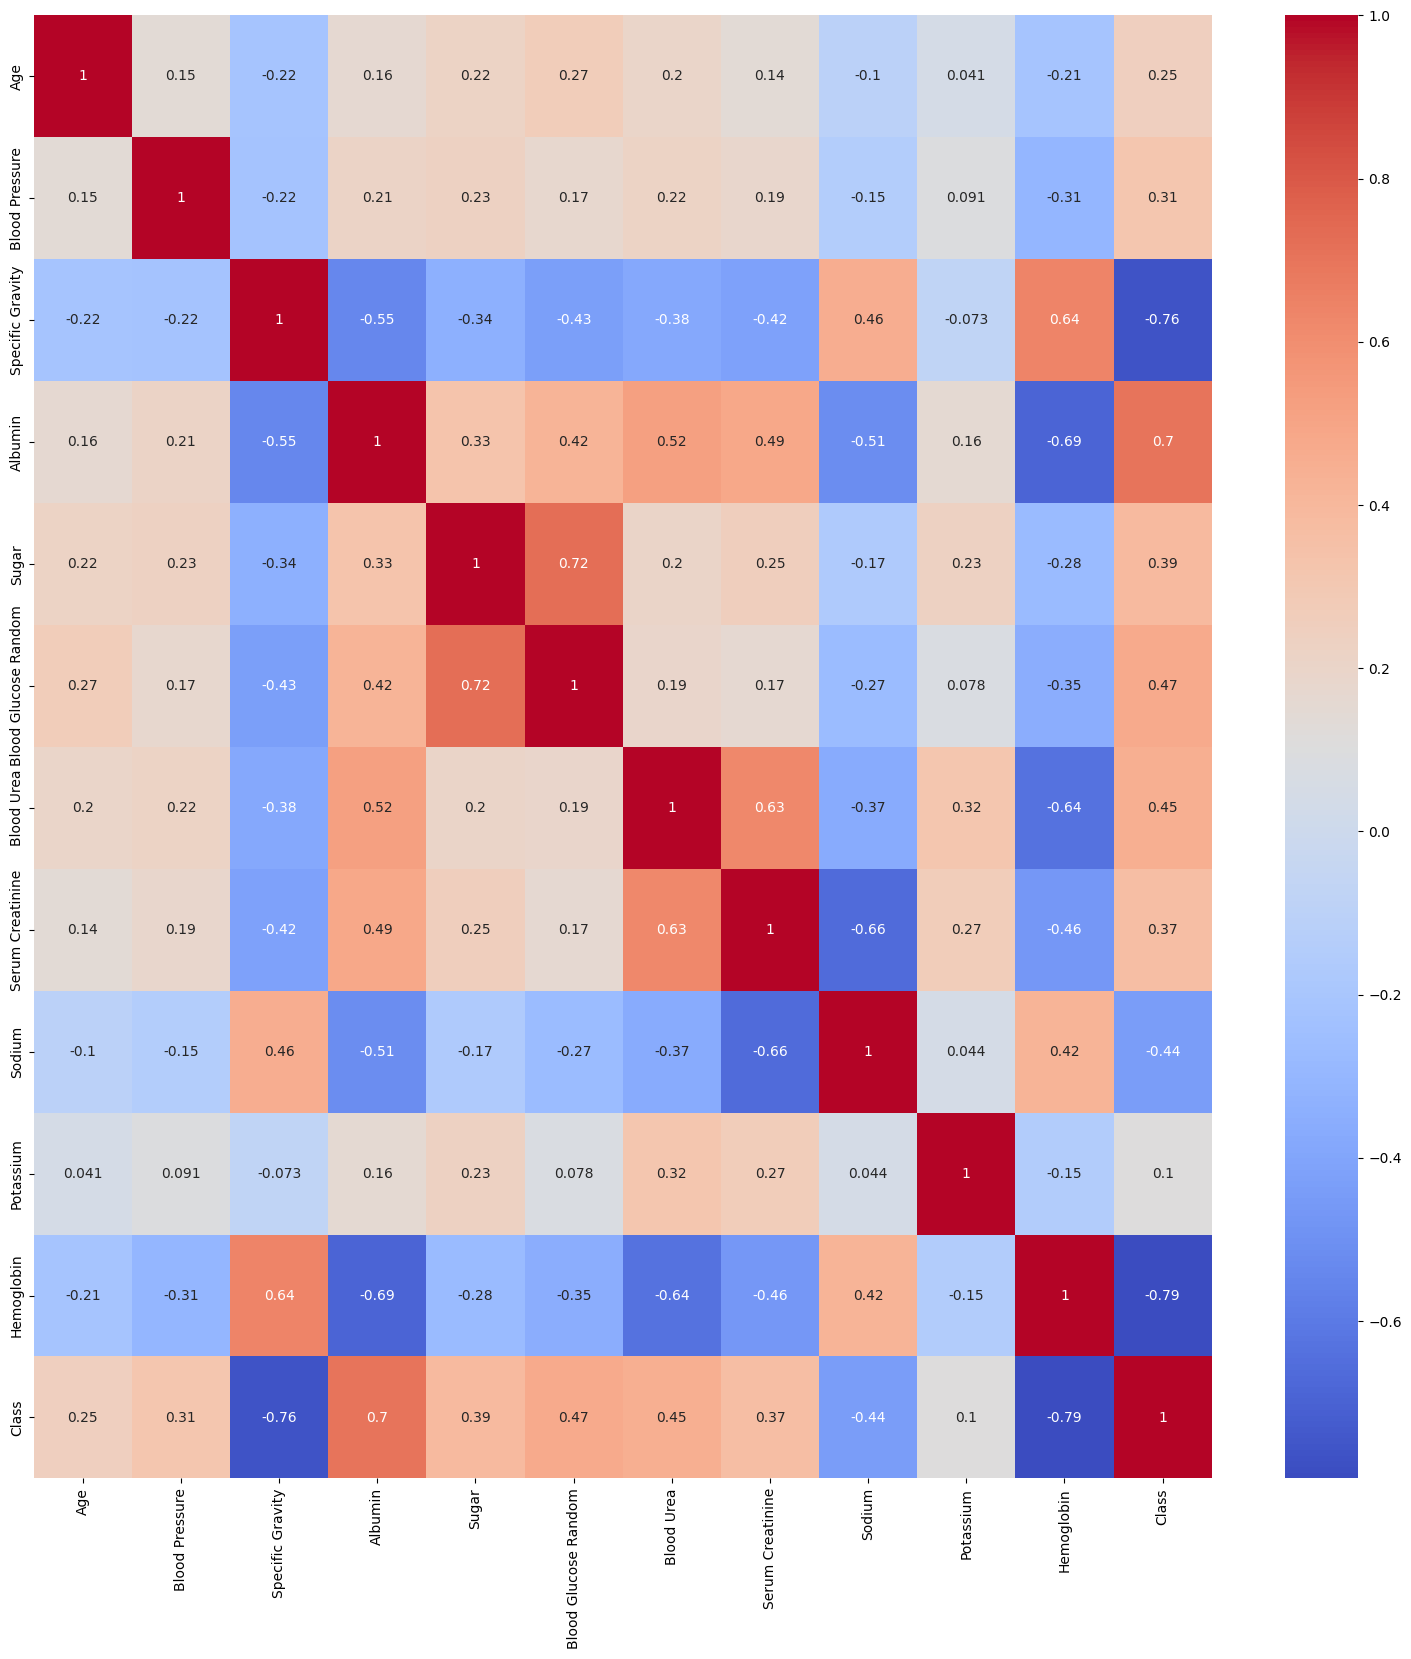

In [166]:
plt.figure(figsize = (19,19))
sns.heatmap(kd_df.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row

**Checking for strong correlations with Classes**

# Exploratory Data Analysis

In [167]:
data = kd_df

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 557
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1098 non-null   float64
 1   Blood Pressure           1092 non-null   float64
 2   Specific Gravity         1022 non-null   float64
 3   Albumin                  1024 non-null   float64
 4   Sugar                    1018 non-null   float64
 5   Red Blood Cells          812 non-null    object 
 6   Pus Cell                 986 non-null    object 
 7   Pus Cell clumps          1108 non-null   object 
 8   Bacteria                 1108 non-null   object 
 9   Blood Glucose Random     1028 non-null   float64
 10  Blood Urea               1078 non-null   float64
 11  Serum Creatinine         1082 non-null   float64
 12  Sodium                   942 non-null    float64
 13  Potassium                940 non-null    float64
 14  Hemoglobin               


- Check for null values
- Scale the values for accurate prediction
- If exists, Drop rows with high number of corrup data

In [169]:
data.shape

(1116, 25)

In [170]:
data.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [171]:
data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1.0
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1.0
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1.0
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1.0
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1.0


**Converting text attributes to numerical attributes**

In [172]:
data['Hypertension'] = data['Hypertension'].map({'yes':1,'no':0})
data['Diabetes Mellitus'] = data['Diabetes Mellitus'].map({'yes':1,'no':0})
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].map({'yes':1,'no':0})
data['Appetite'] = data['Appetite'].map({'good':1,'poor':0})
data['Anemia'] = data['Anemia'].map({'yes':1,'no':0})
data['Pedal Edema'] = data['Pedal Edema'].map({'yes':1,'no':0})
data['Bacteria'] = data['Bacteria'].map({'present':1,'notpresent':0})
data['Pus Cell clumps'] = data['Pus Cell clumps'].map({'present':1,'notpresent':0})
data['Pus Cell'] = data['Pus Cell'].map({'abnormal':1,'normal':0})
data['Red Blood Cells'] = data['Red Blood Cells'].map({'abnormal':1,'normal':0})

In [173]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
554,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
555,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
556,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Dealing with Null Values**

In [174]:
data.isnull().sum()

Age                         18
Blood Pressure              24
Specific Gravity            94
Albumin                     92
Sugar                       98
Red Blood Cells            304
Pus Cell                   130
Pus Cell clumps              8
Bacteria                     8
Blood Glucose Random        88
Blood Urea                  38
Serum Creatinine            34
Sodium                     174
Potassium                  176
Hemoglobin                 104
Packed Cell Volume         140
White Blood Cell Count     210
Red Blood Cell Count       260
Hypertension                 4
Diabetes Mellitus           16
Coronary Artery Disease      8
Appetite                     2
Pedal Edema                  2
Anemia                       2
Class                        4
dtype: int64

**Replcaing column with numerical values with their mean value. Binary classes are kept as null.**

In [175]:
#age
mean_age = data['Age'].mean()
mean_age
data['Age'].fillna(value=mean_age, inplace=True)
#bp
mean_bp  = data['Blood Pressure'].mean()
mean_bp
data['Blood Pressure'].fillna(value=mean_bp, inplace=True)
#sg
mean_sg = data['Specific Gravity'].mean()
mean_sg
data['Specific Gravity'].fillna(value=mean_sg, inplace=True)
#albumin
mean_albumin = data['Albumin'].mean()
mean_albumin
data['Albumin'].fillna(value=mean_albumin, inplace=True)
#sugar
mean_sugar = data['Sugar'].mean()
mean_sugar
data['Sugar'].fillna(value=mean_sugar, inplace=True)
#bgr
mean_bgr =  data['Blood Glucose Random'].mean()
mean_bgr
data['Blood Glucose Random'].fillna(value=mean_bgr, inplace=True)
#bu
mean_bu =  data['Blood Urea'].mean()
mean_bu
data['Blood Urea'].fillna(value=mean_bu, inplace=True)
#sc
mean_sc =  data['Serum Creatinine'].mean()
mean_sc
data['Serum Creatinine'].fillna(value=mean_sc, inplace=True)
#sodium
mean_sodium =  data['Sodium'].mean()
mean_sodium
data['Sodium'].fillna(value=mean_sodium, inplace=True)
#potasium
mean_potassium =  data['Potassium'].mean()
mean_potassium
data['Potassium'].fillna(value=mean_potassium, inplace=True)
#hemoglobin
mean_hemoglobin =  data['Hemoglobin'].mean()
mean_hemoglobin
data['Hemoglobin'].fillna(value=mean_hemoglobin, inplace=True)

In [176]:
data.isnull().sum()

Age                          0
Blood Pressure               0
Specific Gravity             0
Albumin                      0
Sugar                        0
Red Blood Cells            304
Pus Cell                   130
Pus Cell clumps              8
Bacteria                     8
Blood Glucose Random         0
Blood Urea                   0
Serum Creatinine             0
Sodium                       0
Potassium                    0
Hemoglobin                   0
Packed Cell Volume         140
White Blood Cell Count     210
Red Blood Cell Count       260
Hypertension                 4
Diabetes Mellitus           16
Coronary Artery Disease      8
Appetite                     2
Pedal Edema                  2
Anemia                       2
Class                        4
dtype: int64

In [177]:
#dropping still existing null values
data.dropna(subset=['Diabetes Mellitus'], how='all', inplace=True)
data.dropna(subset=['Appetite'], how='all', inplace=True)
data.dropna(subset=['Pedal Edema'], how='all', inplace=True)
data.dropna(subset=['Anemia'], how='all', inplace=True)
data.dropna(subset=['Class'], how='all', inplace=True)
data.dropna(subset=['Red Blood Cell Count'], how='all', inplace=True)
data.dropna(subset=['Packed Cell Volume'], how='all', inplace=True)
data.dropna(subset=['White Blood Cell Count'], how='all', inplace=True)
data.dropna(subset=['Red Blood Cells'], how='all', inplace=True)
data.dropna(subset=['Pus Cell'], how='all', inplace=True)
data.dropna(subset=['Pus Cell clumps'], how='all', inplace=True)
data.dropna(subset=['Bacteria'], how='all', inplace=True)
data.dropna(subset=['Coronary Artery Disease'], how='all', inplace=True)

In [178]:
# #Final dataset after preprocessing
# data.to_csv("kidney_clean.csv",  encoding='utf-8')

In [179]:
#Load Final Dataset
# data = pd.read_csv("kidney_clean.csv")

In [180]:
# data.drop(['Unnamed: 0'],axis=1,inplace=True)

# Data Spliting

In [181]:
data = pd.read_csv("/content/kidney_clean.csv")

In [182]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [183]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0.0,0,1,1,1.0
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0.0,0,0,1,1.0
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0.0,0,1,0,1.0
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1.0,0,1,0,1.0
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1.0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,47,6700,4.9,0,0,0.0,1,0,0,0.0
678,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,54,7800,6.2,0,0,0.0,1,0,0,0.0
679,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,49,6600,5.4,0,0,0.0,1,0,0,0.0
680,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,51,7200,5.9,0,0,0.0,1,0,0,0.0


In [184]:

X = data.iloc[:,:-1]
y = data['Class']

In [185]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

In [186]:
X_train

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
14,56.0,70.0,1.015,4.0,1.0,1,0,0,0,210.0,...,16.1,52,12500,5.6,0,0,0.0,1,0,0
605,55.0,80.0,1.020,0.0,0.0,0,0,0,0,104.0,...,17.3,52,8200,4.8,0,0,0.0,1,0,0
669,15.0,80.0,1.025,0.0,0.0,0,0,0,0,93.0,...,16.7,50,6200,5.2,0,0,0.0,1,0,0
220,60.0,80.0,1.025,0.0,0.0,0,0,0,0,131.0,...,14.5,41,10700,5.1,0,0,0.0,1,0,0
110,22.0,60.0,1.025,0.0,0.0,0,0,0,0,97.0,...,13.5,42,7900,6.4,0,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,70.0,80.0,1.020,0.0,0.0,0,0,0,0,74.0,...,15.1,48,9700,5.6,0,0,0.0,1,0,0
398,42.0,80.0,1.020,0.0,0.0,0,0,0,0,132.0,...,14.4,50,5000,4.5,0,0,0.0,1,0,0
126,60.0,80.0,1.025,0.0,0.0,0,0,0,0,81.0,...,15.0,46,10500,5.3,0,0,0.0,1,0,0
95,58.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,14.0,50,6700,6.5,0,0,0.0,1,0,0


In [187]:
X_test

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
638,32.0,60.0,1.025,0.0,0.0,0,0,0,0,102.0,...,14.6,41,6800,5.1,0,0,0.0,1,0,0
666,57.0,60.0,1.020,0.0,0.0,0,0,0,0,132.0,...,15.4,42,11000,4.5,0,0,0.0,1,0,0
118,34.0,70.0,1.025,0.0,0.0,0,0,0,0,87.0,...,17.1,47,7400,6.1,0,0,0.0,1,0,0
64,56.0,80.0,1.025,0.0,0.0,0,0,0,0,139.0,...,14.8,42,5600,5.5,0,0,0.0,1,0,0
68,24.0,70.0,1.025,0.0,0.0,0,0,0,0,140.0,...,16.3,48,5800,5.6,0,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,30.0,60.0,1.025,0.0,0.0,0,0,0,0,120.0,...,13.4,44,10700,5.8,0,0,0.0,1,0,0
41,59.0,70.0,1.010,1.0,3.0,1,1,0,0,424.0,...,12.6,37,10200,4.1,1,1,1.0,1,0,0
608,58.0,70.0,1.020,0.0,0.0,0,0,0,0,102.0,...,15.0,40,8100,4.9,0,0,0.0,1,0,0
100,23.0,80.0,1.020,0.0,0.0,0,0,0,0,99.0,...,17.7,46,4300,5.5,0,0,0.0,1,0,0


In [188]:
y_train

14     1.0
605    0.0
669    0.0
220    0.0
110    0.0
      ... 
476    0.0
398    0.0
126    0.0
95     0.0
188    1.0
Name: Class, Length: 511, dtype: float64

In [189]:
y_test

638    0.0
666    0.0
118    0.0
64     0.0
68     0.0
      ... 
438    0.0
41     1.0
608    0.0
100    0.0
440    0.0
Name: Class, Length: 171, dtype: float64

# Model Training

**Importing classifiers**

In [190]:
from sklearn.ensemble import  BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

**Using Cross Validation and applying Classifier Algorithms**

In [191]:

crossvalidation_score=[]
mod = []
model =[BaggingClassifier(), SVC(),RandomForestClassifier(), GradientBoostingClassifier(),
        DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier(),LogisticRegression(),GaussianNB(),]
for mdl in model:
    crossvalidation_score.append(cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(mdl)
model_df= pd.DataFrame(columns=['model','crossvalidation_score'])
model_df['model']= mod
model_df['crossvalidation_score']= crossvalidation_score
model_df.sort_values(by=['crossvalidation_score'], ascending=True)


,model,crossvalidation_score
1,SVC(),0.790596
6,KNeighborsClassifier(),0.898211
0,BaggingClassifier(),0.998039
7,LogisticRegression(),0.998058
2,RandomForestClassifier(),1.000000
3,GradientBoostingClassifier(),1.000000
4,DecisionTreeClassifier(),1.000000
5,ExtraTreeClassifier(),1.000000
8,GaussianNB(),1.000000


**KNeighbors Classifier**

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       121
         1.0       1.00      0.58      0.73        50

    accuracy                           0.88       171
   macro avg       0.93      0.79      0.83       171
weighted avg       0.90      0.88      0.87       171

<bound method ClassifierMixin.score of KNeighborsClassifier()>


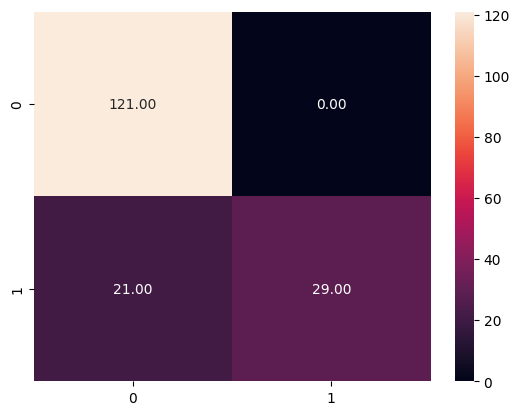

In [192]:
from sklearn.metrics import classification_report, confusion_matrix
kmodel = KNeighborsClassifier()
kmodel.fit(X_train,y_train)
pred = kmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(kmodel.score)

**Logistic Regression**

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       121
         1.0       1.00      0.94      0.97        50

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

<bound method ClassifierMixin.score of LogisticRegression()>


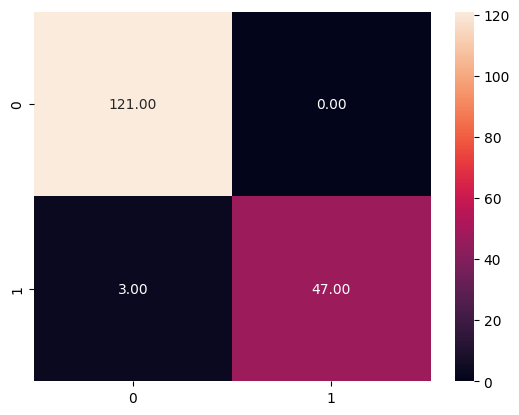

In [193]:
from sklearn.metrics import classification_report, confusion_matrix
lmodel = LogisticRegression()
lmodel.fit(X_train,y_train)
pred = lmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(lmodel.score)

Decision Tree

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       121
         1.0       1.00      0.96      0.98        50

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

<bound method ClassifierMixin.score of DecisionTreeClassifier()>


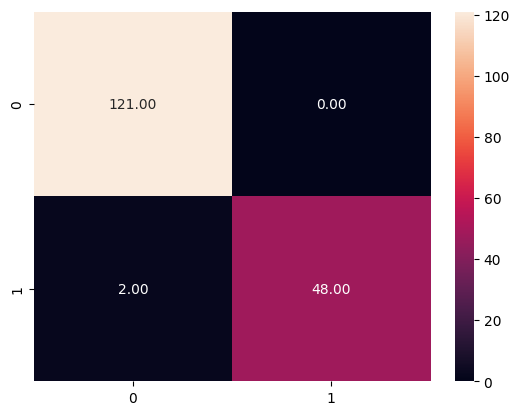

In [194]:
from sklearn.metrics import classification_report, confusion_matrix
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,y_train)
pred = dmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(dmodel.score)

Gradient Boosting Classifier

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       121
         1.0       1.00      0.96      0.98        50

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

<bound method ClassifierMixin.score of GradientBoostingClassifier()>


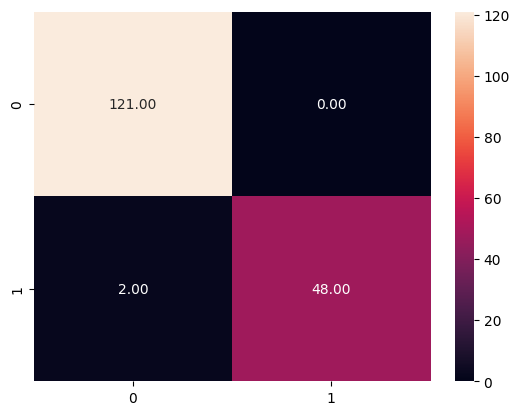

In [195]:

gmodel = GradientBoostingClassifier()
gmodel.fit(X_train,y_train)
pred = gmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(gmodel.score)

**Random Forest Classifier**

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       121
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

<bound method ClassifierMixin.score of RandomForestClassifier()>


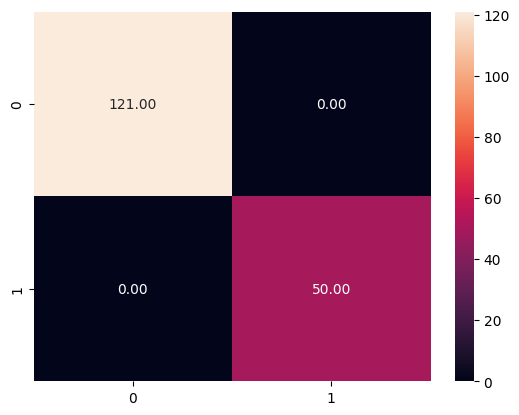

In [196]:
from sklearn.metrics import classification_report, confusion_matrix
rmodel = RandomForestClassifier()
rmodel.fit(X_train,y_train)
pred = rmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(rmodel.score)


## Picking the final Model

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       121
         1.0       1.00      0.94      0.97        50

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

<bound method ClassifierMixin.score of LogisticRegression()>


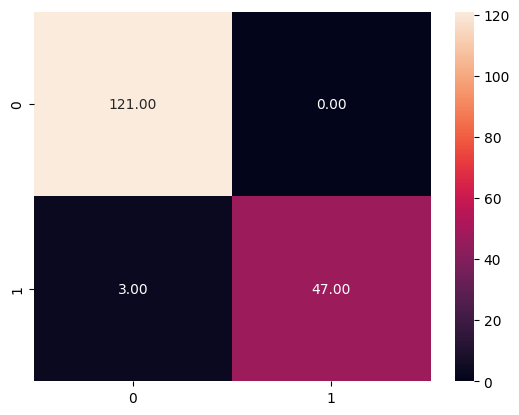

In [197]:
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(model.score)


# Saving the model

In [198]:
import pickle  # Pickle is a library that helps us to save model
with open('ckd_prediction.pkl', 'wb') as files:
    pickle.dump(model, files)

In [199]:
with open('ckd_prediction.pkl' , 'rb') as f: # Loading the model
    fmodel = pickle.load(f) # fmodel is the loaded model

In [200]:
fmodel.predict(X_test) # Running prediction on test set using the loaded model

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0.])

In [201]:
# ignoring scikit learn warnings
import warnings
warnings.filterwarnings('ignore')

In [202]:
# Running prediction on a single patient data using the loaded model
fmodel.predict([[48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0.0,0,1,1]])

array([1.])

In [203]:
# Running prediction on a single patient data using the loaded model
fmodel.predict([[59.0,70.0,1.025,0.0,0.0,0,0,0,0,130.0,39.0,0.7,147.0,4.7,13.5,46,6700,4.5,0,0,0.0,1,0,0]])

array([0.])